In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Stable_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 1024
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files(config, root_dir ):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/20DLnzLessData/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "MSEs" in file and "bwidx" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses_full = mses_full.rename({"bw":"_bw"}, axis=1)
                mses_full["bw"] = mses_full["_bw"].apply(lambda x: x[0])
                mses = mses_full.drop("_bw", axis=1)[["bw", "mse"]].sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files(config=config, root_dir=root_dir)
len(bws)

            bw          mse
10    0.004538   107.886398
11    0.005992   110.832663
12    0.007912   115.531127
13    0.010446   123.209005
14    0.013793   139.857458
15    0.018211   176.219437
16    0.024046   258.991376
17    0.031749   459.998538
18    0.041919   921.474503
19    0.055348  1808.732971
20    0.073079  3124.261150
21    0.096490  4221.772284
22    0.127401  4011.781035
23    0.168214  3231.481742
24    0.222102  2510.646064
25    0.293252  2059.988919
26    0.387196  1828.858270
27    0.511235  1713.508693
28    0.675010  1646.705823
29    0.891251  1594.727393
30    1.135011  1551.048161
31    1.445440  1504.762690
32    1.840772  1451.466348
33    2.344229  1385.268791
34    2.985383  1298.653995
35    3.801894  1183.366938
36    4.841724  1029.126708
37    6.165950   832.818452
38    7.852356   639.270768
39   10.000000   507.050383
40   12.589254   439.385509
41   15.848932   406.053625
42   19.952623   389.971525
43   25.118864   382.052488
44   31.622777   377

70

Text(0.5, 1.0, 'Minimum MSE is (0.0002818382931264455, 102.94441364468888)')

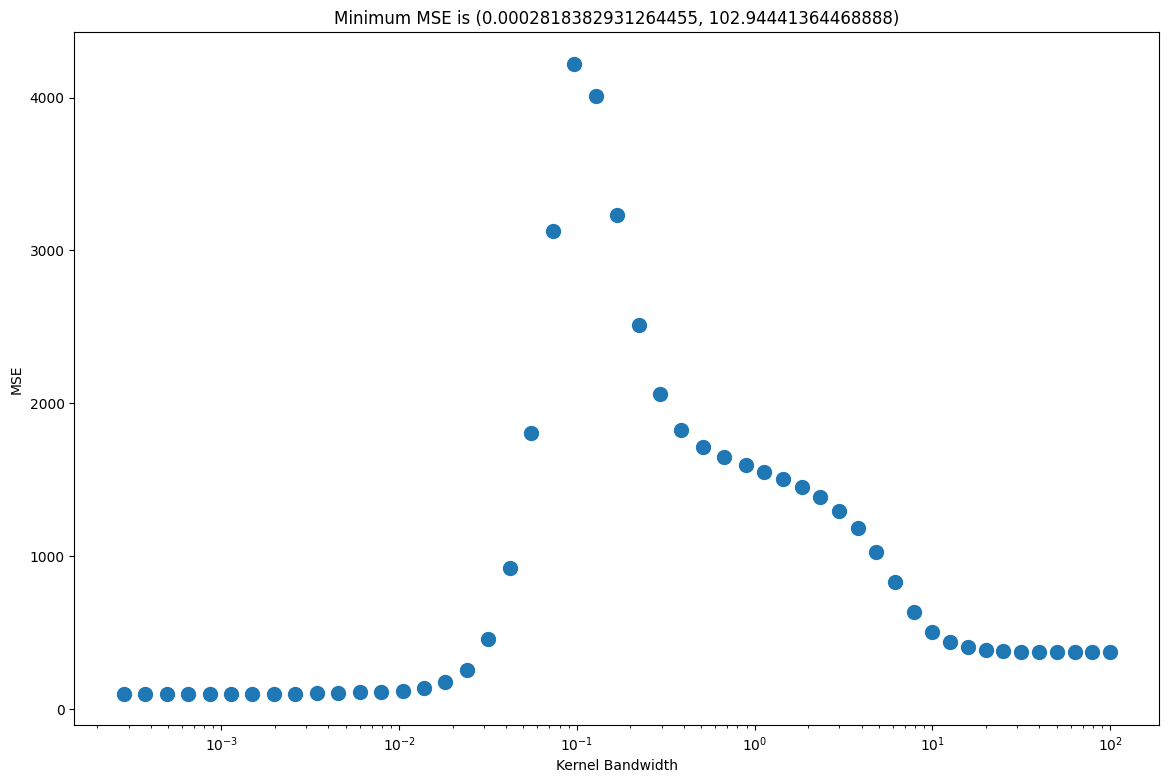

In [5]:
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 0], mses.iloc[np.argmin(mses.mse), 1]}")

/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_5086/377538874.py:13: RuntimeWarning: invalid value encountered in divide
  total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
/var/folders/68/vrxg2n311sz1gs264pkys2zh0000gn/T/ipykernel_5086/377538874.py:14: RuntimeWarning: invalid value encountered in divide
  all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)


17.21342504112577 0.0073079 inf


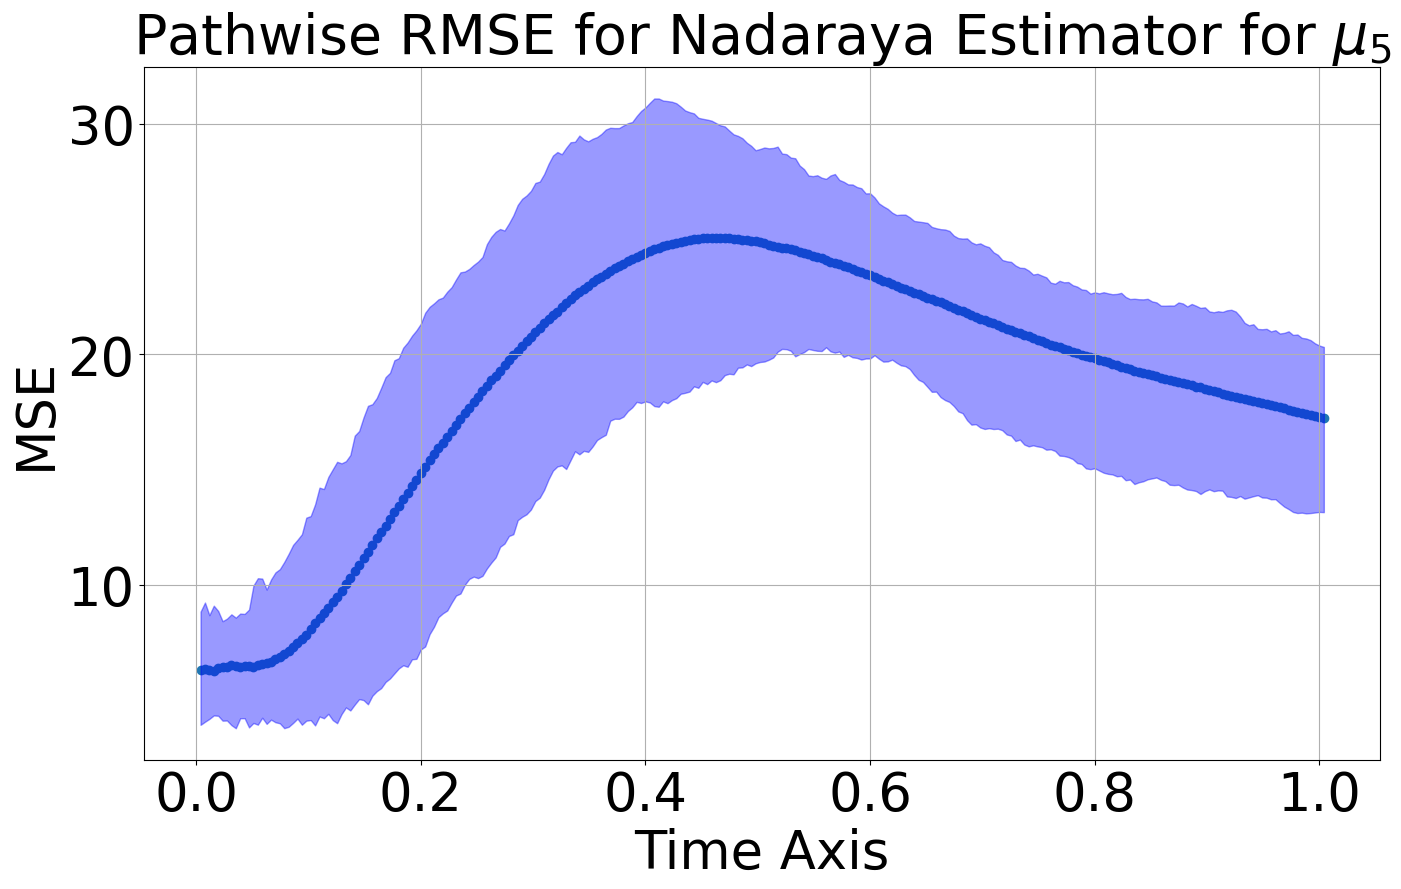

Final time cumulative MSE local-time error 17.21342504112577 with IQR ((13.147607058851163, 20.316949969470688))at bw 0.0073079 for 0.75FConst

16.758542388177496 0.009649 17.21342504112577


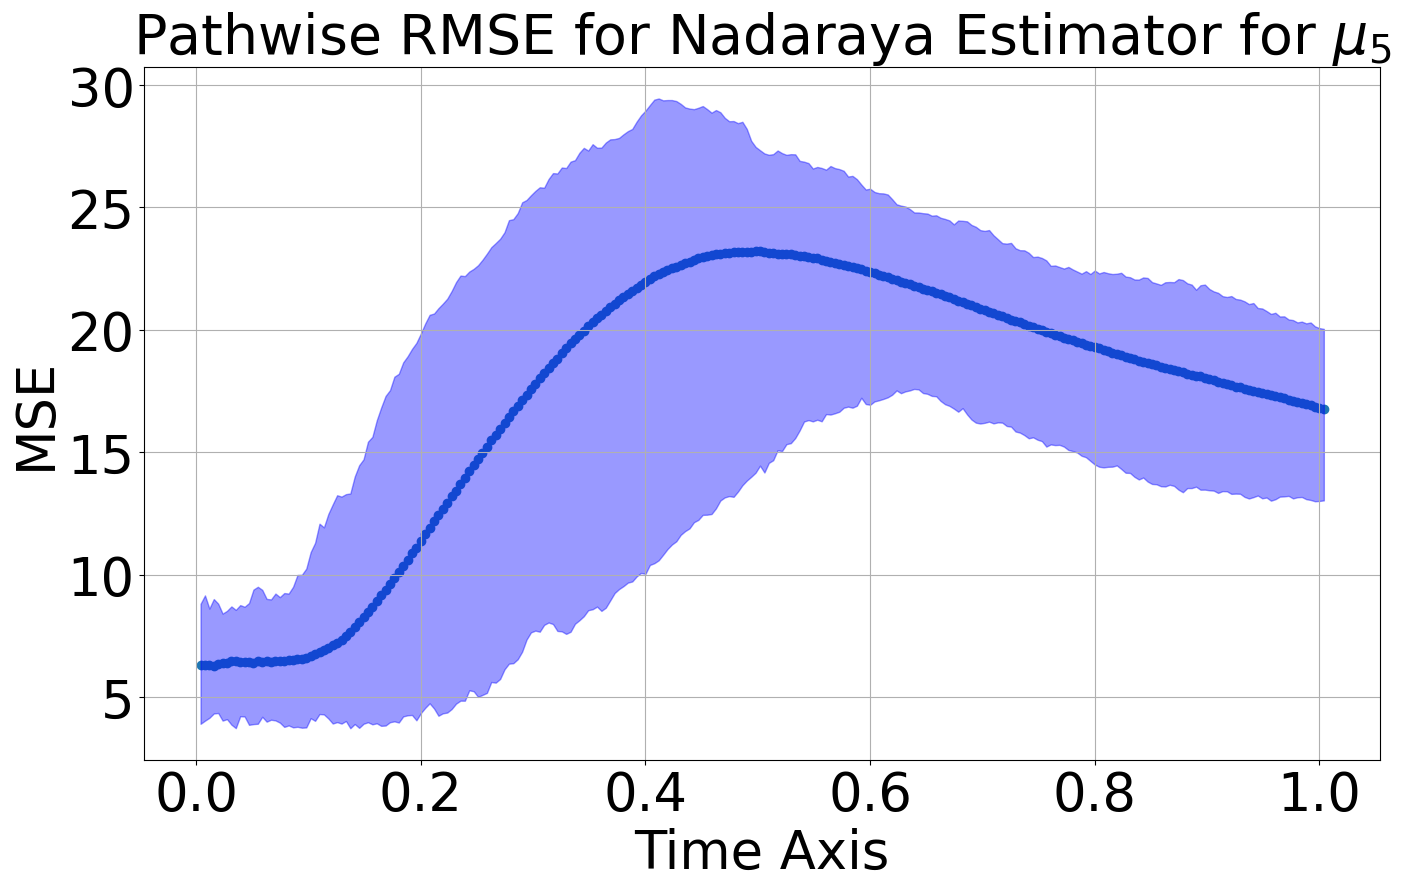

Final time cumulative MSE local-time error 16.758542388177496 with IQR ((13.03226572312922, 20.038486470818313))at bw 0.009649 for 0.75FConst

13.883748702400535 0.0127401 16.758542388177496


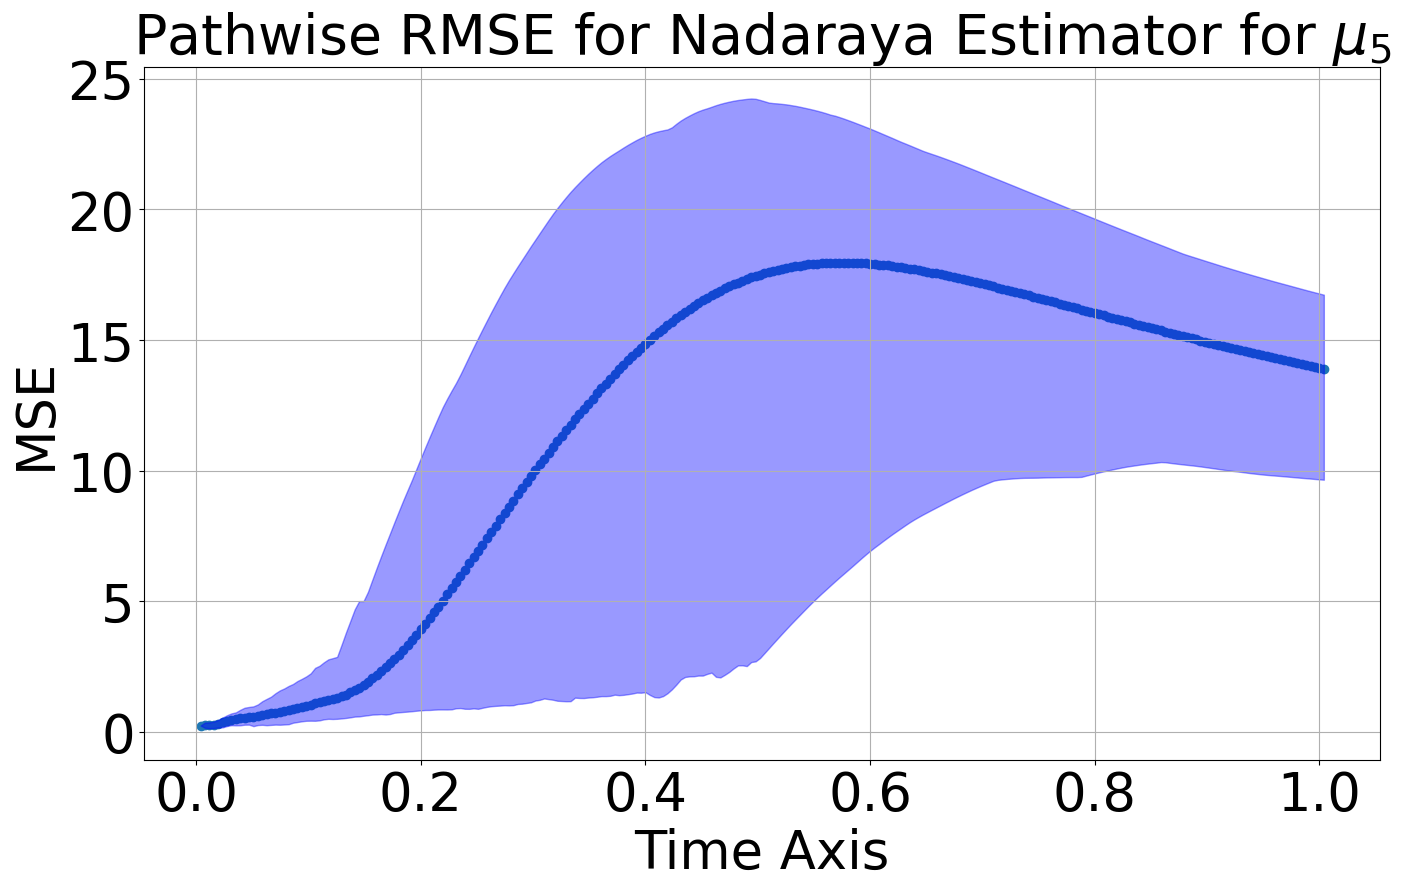

Final time cumulative MSE local-time error 13.883748702400535 with IQR ((9.65207912361074, 16.7338299095585))at bw 0.0127401 for 0.75FConst

13.661207475861142 0.0168214 13.883748702400535


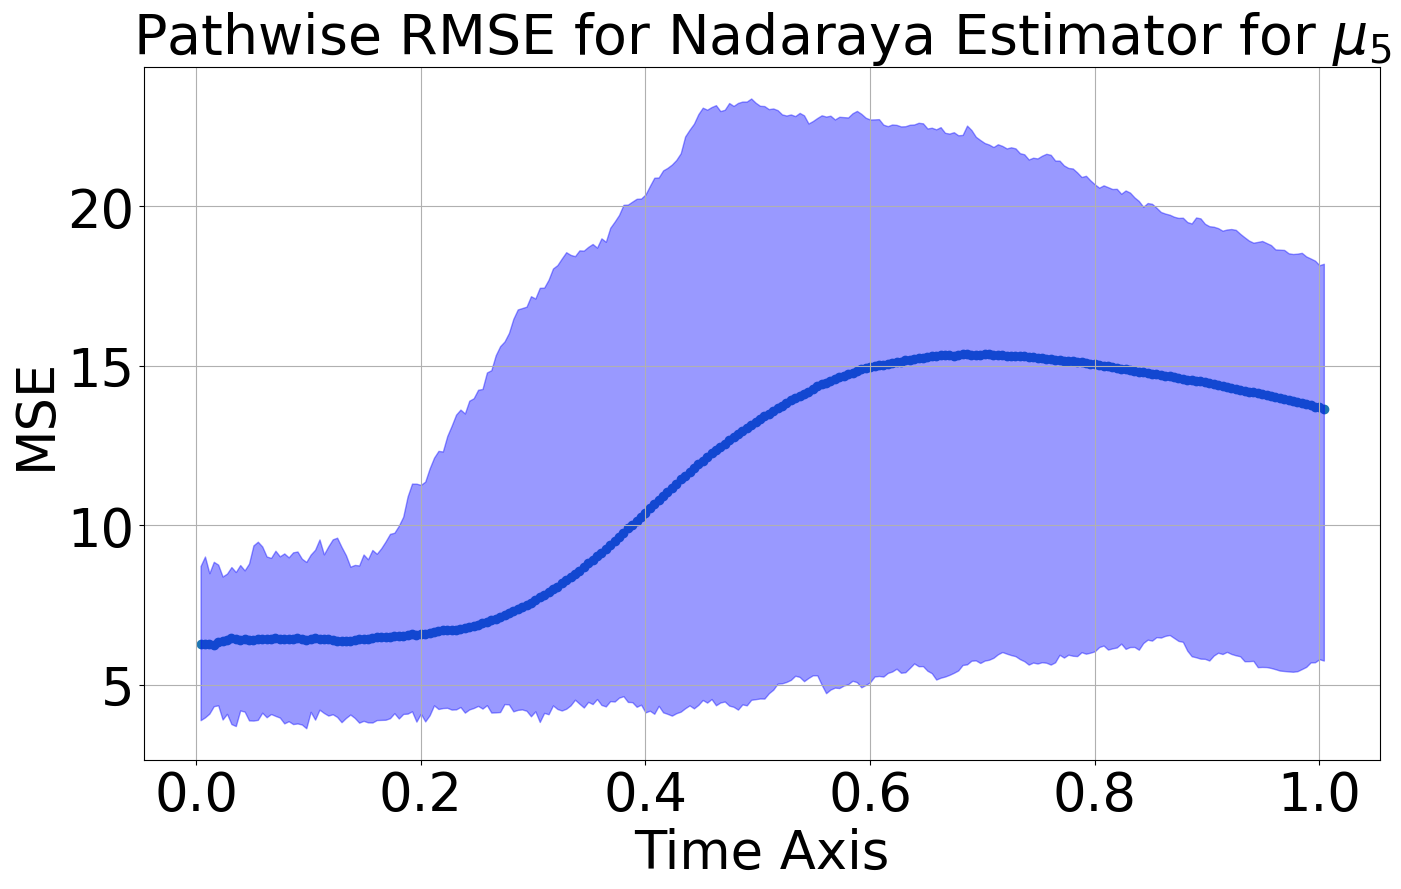

Final time cumulative MSE local-time error 13.661207475861142 with IQR ((5.7605037686843925, 18.202258396133452))at bw 0.0168214 for 0.75FConst

9.693297097550936 0.0222102 13.661207475861142


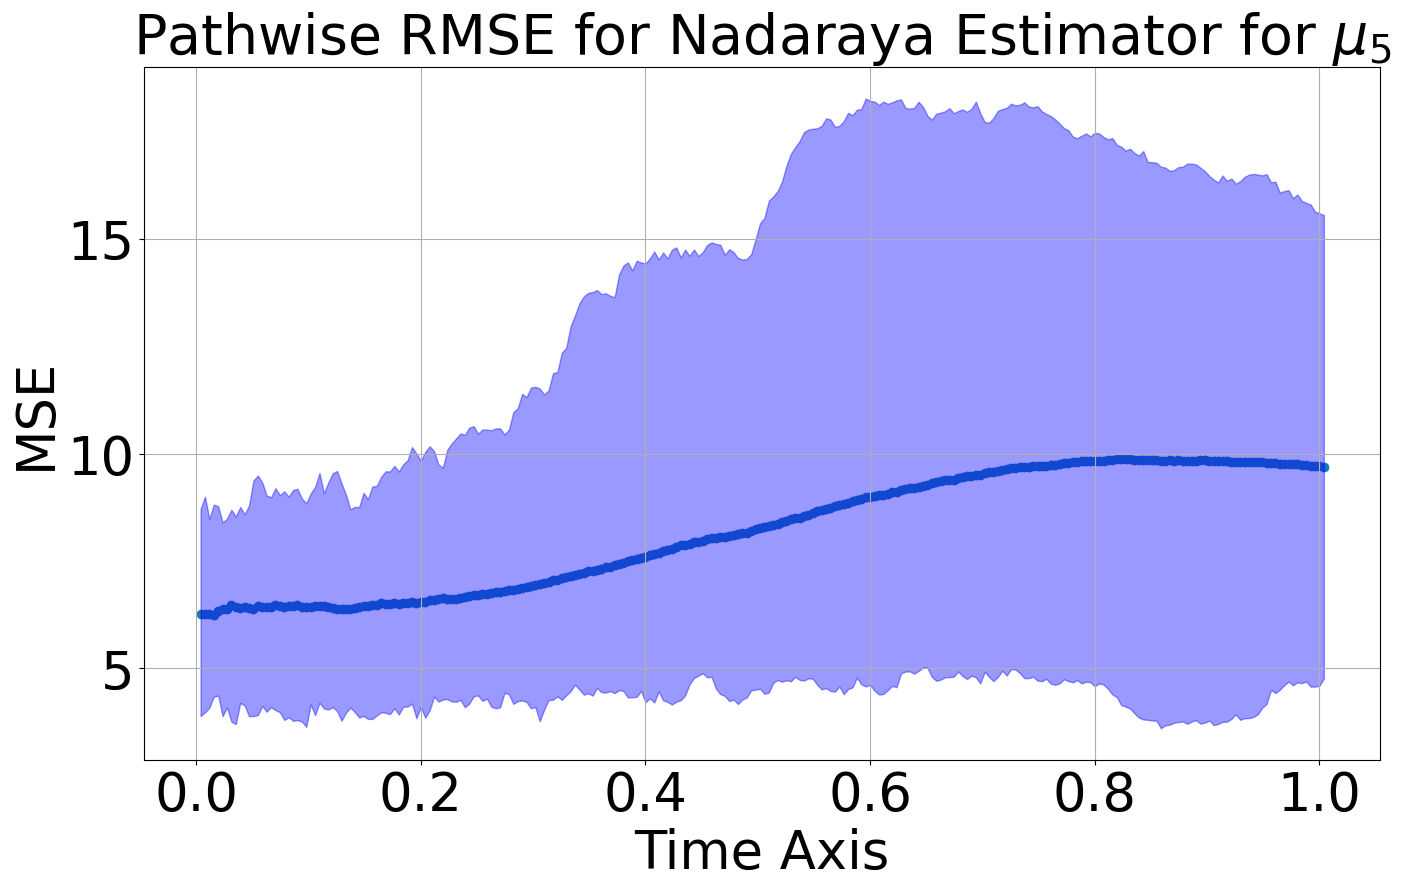

Final time cumulative MSE local-time error 9.693297097550936 with IQR ((4.763437021410805, 15.549240162637728))at bw 0.0222102 for 0.75FConst

7.694973394205368 0.0293252 9.693297097550936


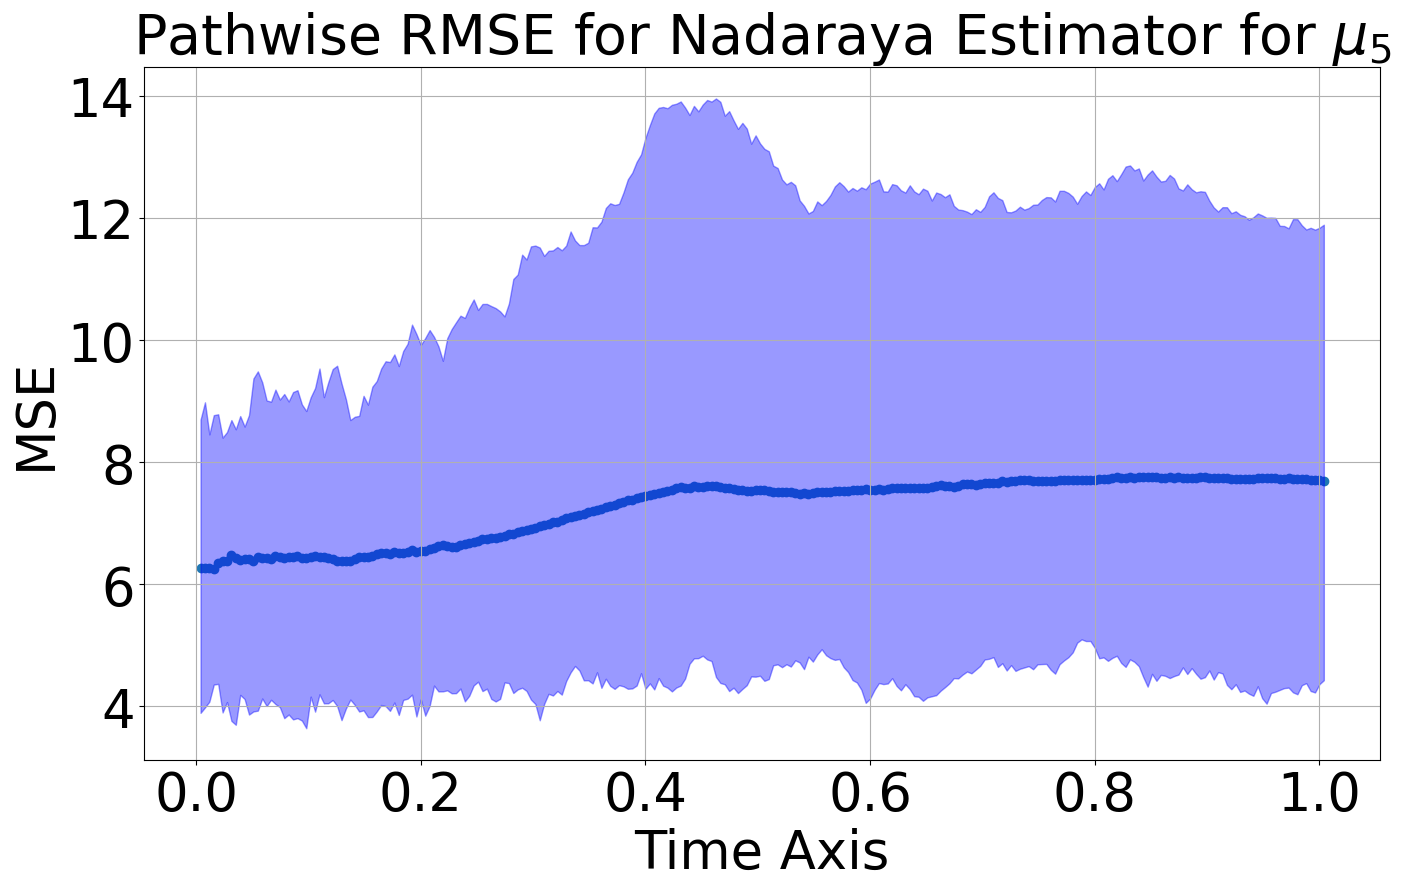

Final time cumulative MSE local-time error 7.694973394205368 with IQR ((4.429055526529426, 11.888373750675312))at bw 0.0293252 for 0.75FConst

7.440140042351348 0.0387196 7.694973394205368


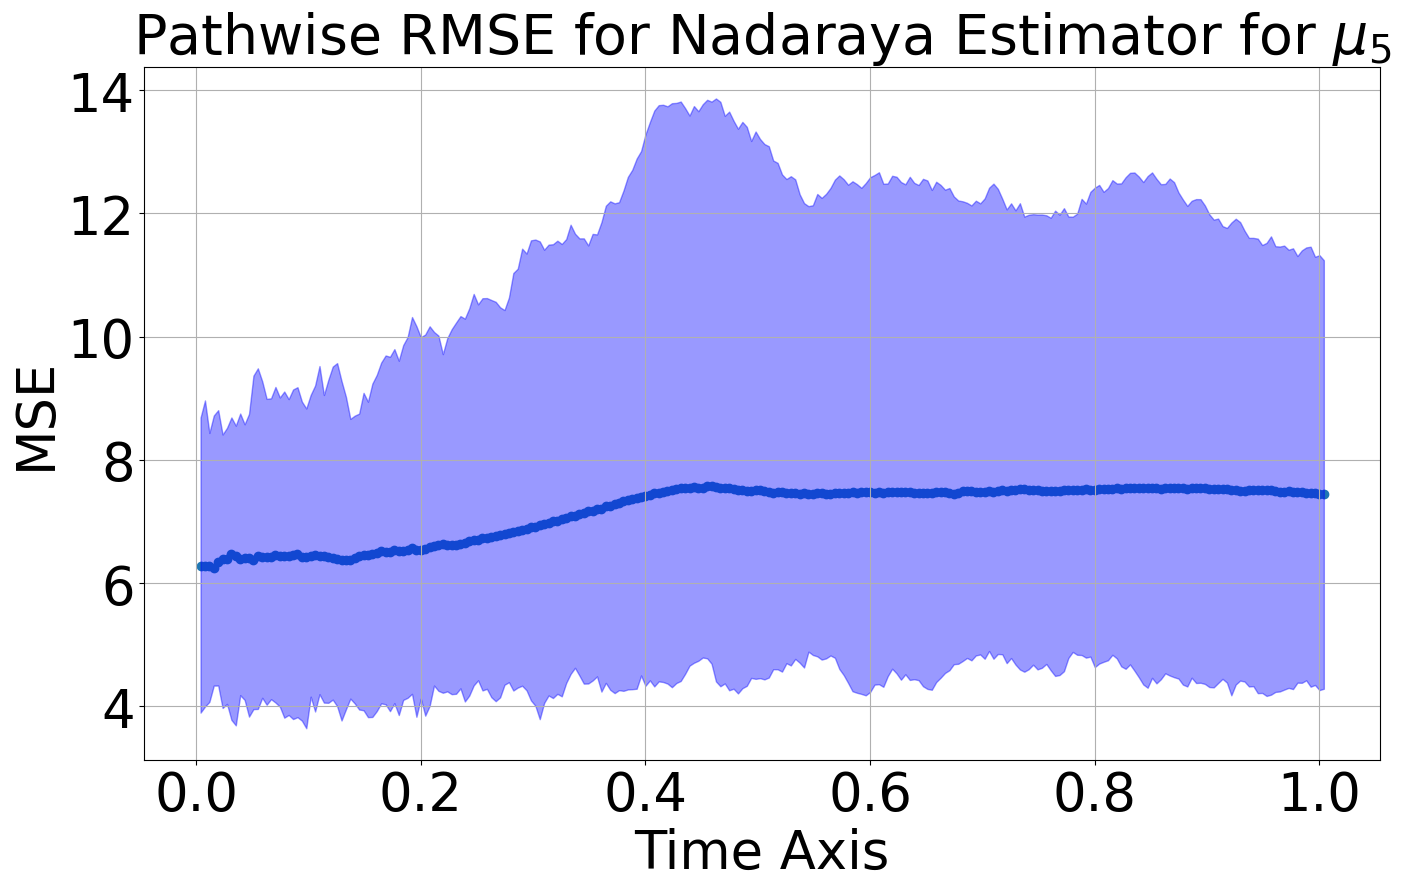

Final time cumulative MSE local-time error 7.440140042351348 with IQR ((4.286312263726019, 11.24165349400761))at bw 0.0387196 for 0.75FConst

7.348051997543943 0.0511235 7.440140042351348


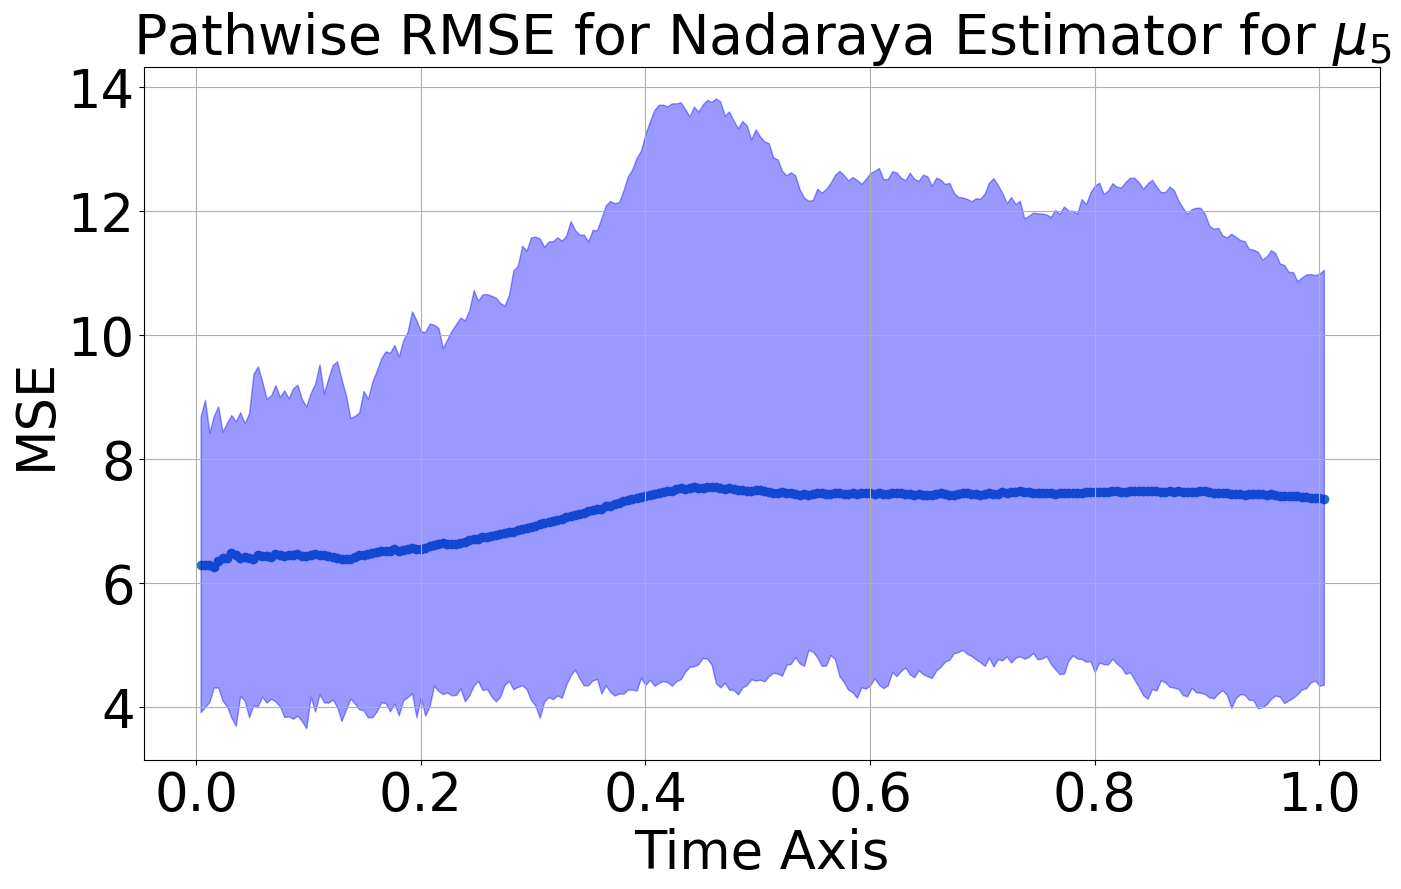

Final time cumulative MSE local-time error 7.348051997543943 with IQR ((4.35274407162307, 11.043360184554963))at bw 0.0511235 for 0.75FConst

4.315124637205361 0.067501 7.348051997543943


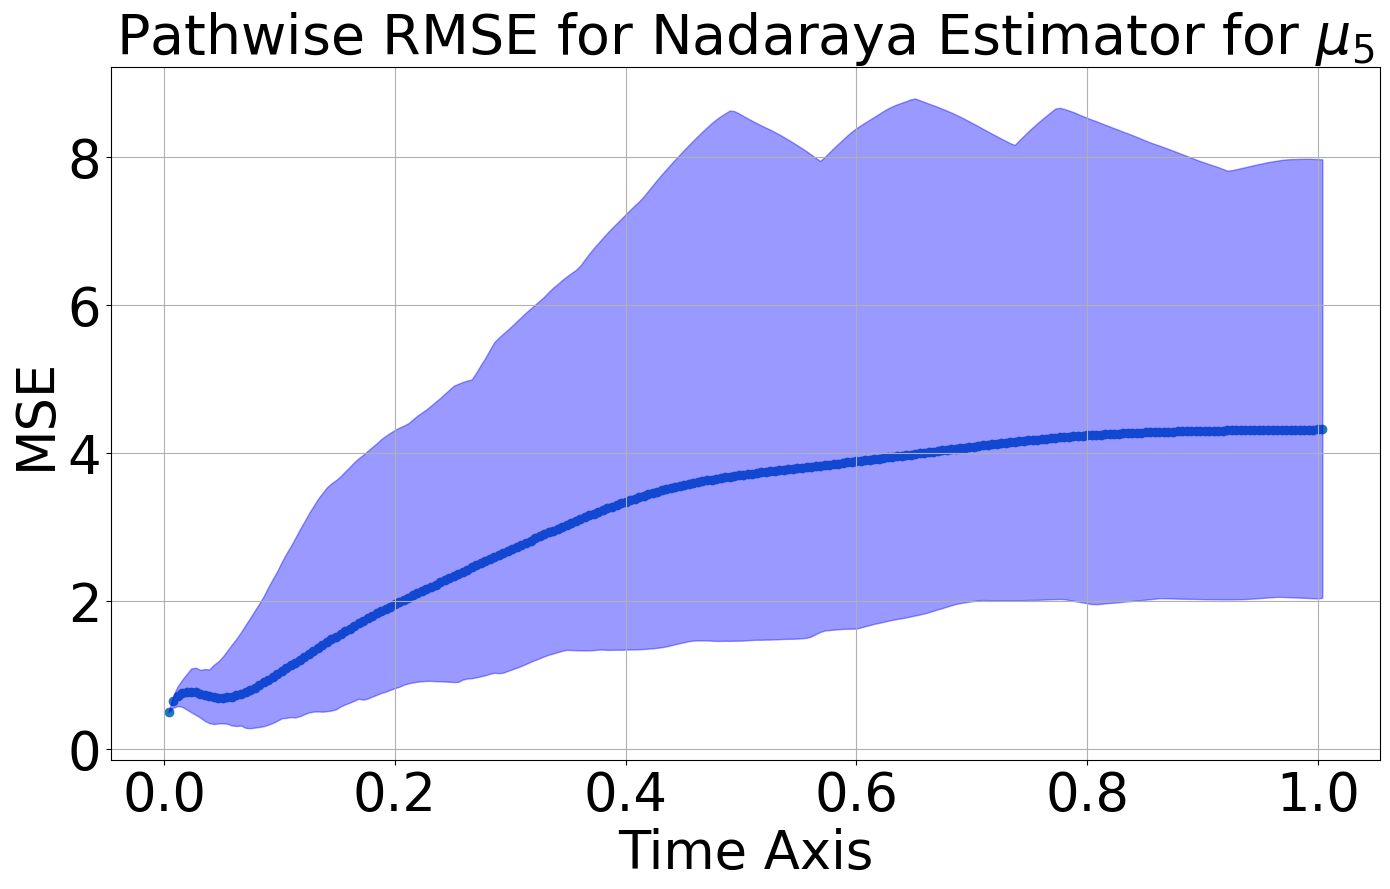

Final time cumulative MSE local-time error 4.315124637205361 with IQR ((2.0404724657561233, 7.962057548850625))at bw 0.067501 for 0.75FConst

7.277661590456414 0.0891251 4.315124637205361
7.6635464175173045 0.1 4.315124637205361
4.403124029947963 0.1135011 4.315124637205361
4.462858435760523 0.144544 4.315124637205361
4.532867961358121 0.1840772 4.315124637205361
4.612114936660756 0.2344229 4.315124637205361
4.701560474805933 0.2985383 4.315124637205361
4.810531585845408 0.3801894 4.315124637205361
4.967858634785887 0.4841724 4.315124637205361
5.196455024053497 0.616595 4.315124637205361
7.715450684124289 0.7852356 4.315124637205361


In [6]:
curr_rmse = np.inf
toSave = False
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])
    all_local_states = np.load(file[1])
    if all_local_states.shape[0] != 2: continue
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        time_steps = np.linspace(config.t0,config.deltaT*all_true_states.shape[2],all_true_states.shape[2])
        all_global_errors = np.sum(np.power(all_true_states- all_local_states,2), axis=-1)
        all_global_errors=all_global_errors.reshape(-1, all_global_errors.shape[-1])            # (K, N, T)
        total_local_errors = np.sqrt(np.mean(all_global_errors, axis=(0)))/np.sqrt(time_steps)
        all_paths_err = np.sqrt(all_global_errors)/np.sqrt(time_steps)
        total_local_errors[total_local_errors==np.inf] = 0.
        all_paths_err[all_paths_err==np.inf] = 0.
        total_local_errors_minq, total_local_errors_maxq  = np.quantile(all_paths_err, q=[0.005, 0.995], axis=0) # (T,)
        print(total_local_errors[-1], bw, curr_rmse)
        i += 1
        if total_local_errors[-1]  < curr_rmse:
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            plt.grid(True)
            ax.scatter(time_steps, total_local_errors)
            plt.fill_between(time_steps,y1=total_local_errors_minq, y2=total_local_errors_maxq, color="blue", alpha=0.4)
            ax.set_title(rf"Pathwise RMSE for Nadaraya Estimator for $\mu_5$",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((root_dir + f"DiffusionModelPresentationImages/IIDNadaraya/20DLnzLessData/IIDNadaraya_{config.ndims}DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 8)}_MinIQR_{round(total_local_errors[-1], 8)}MeanIQR_{round(total_local_errors_maxq[-1], 8)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")

In [7]:
from utils.resource_logger import wallclock_and_system_metrics
data = wallclock_and_system_metrics(config.nadaraya_resource_logging_path, inclusive=False)
data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/marcos/GitHubRepos/FractionalBrownianMotion/src/generative_modelling/resource_logging/trained_rec_PM_ST_1000FTh_MLP_2LFac_NSTgtNFMReg_20DLnz_750e-01FConst_VPSDE_T256_Ndiff10000_Tdiff1000e+00_DiffEmbSz64_ResLay10_ResChan8_DiffHdnSz64_TrueHybd_TrueWghts_t00_dT3906e-03_MLP_H4_CUp20_tl110.json.json'